In [12]:
'''
Jan 12, 2017
CPM
NBA_shot_logs

https://www.kaggle.com/socathie/kickstarter-project-statistics
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
# live = pd.read_csv('input/live.csv',index_col=0)
back = pd.read_csv('input/most_backed.csv',index_col=0)

In [24]:
back.head()

,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [25]:
back.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 12 columns):
amt.pledged         4000 non-null float64
blurb               4000 non-null object
by                  4000 non-null object
category            4000 non-null object
currency            4000 non-null object
goal                4000 non-null float64
location            4000 non-null object
num.backers         4000 non-null int64
num.backers.tier    4000 non-null object
pledge.tier         4000 non-null object
title               4000 non-null object
url                 4000 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 406.2+ KB


In [26]:
back.describe()

,amt.pledged,goal,num.backers
count,4.000000e+03,4.000000e+03,4000.000000
mean,2.899923e+05,6.175203e+04,3582.875750
std,7.119369e+05,1.266715e+05,7316.102809
min,1.925000e+03,1.000000e+00,1109.000000
25%,6.771300e+04,1.300000e+04,1406.750000
50%,1.205860e+05,3.000000e+04,1946.000000
75%,2.593680e+05,6.000000e+04,3372.000000
max,2.033899e+07,2.000000e+06,219382.000000


In [27]:
# clean the data
t = []
for i,row in enumerate(back['pledge.tier']):
    if '...' in row:
        t.append(i)
print(t)

[714, 981, 1170, 1409, 3395, 3744]


In [28]:
back = back.drop(back.index[t])

In [29]:
# Convert str to float.
def num_tier(string):    
    return len(string[1:-1].split(', '))

def pledge_tier_int(string):
    l = []
    for s in string[1:-1].split(', '):
        l.append(float(s))
    return l

back['num of tier'] = back['pledge.tier'].apply(num_tier)
back['pledge.tier_int'] = back['pledge.tier'].apply(pledge_tier_int)

In [31]:
back.head(3)

,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,num of tier,pledge.tier_int
0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,4,"[20.0, 35.0, 100.0, 500.0]"
1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,12,"[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0..."
2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...,64,"[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100...."


In [40]:
back = back[back['currency']=='usd']

In [42]:
back.reset_index(drop=True,inplace=True)
back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 14 columns):
amt.pledged         3432 non-null float64
blurb               3432 non-null object
by                  3432 non-null object
category            3432 non-null object
currency            3432 non-null object
goal                3432 non-null float64
location            3432 non-null object
num.backers         3432 non-null int64
num.backers.tier    3432 non-null object
pledge.tier         3432 non-null object
title               3432 non-null object
url                 3432 non-null object
num of tier         3432 non-null int64
pledge.tier_int     3432 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 375.5+ KB


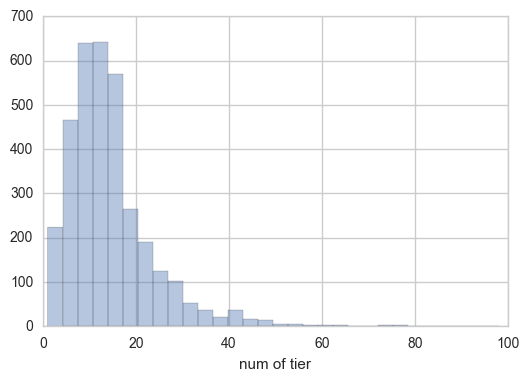

In [43]:
sns.set_style('whitegrid')
sns.distplot(back['num of tier'],kde=False,bins=30)

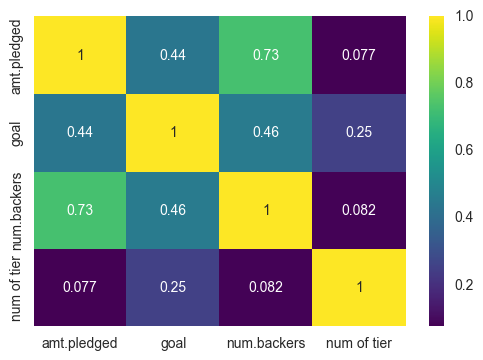

In [44]:
sns.heatmap(back.corr(),annot=True,cmap='viridis')

In [45]:
back['pledge.tier_int_mean'] = back['pledge.tier_int'].apply(np.mean)
back['pledge.tier_int_std'] = back['pledge.tier_int'].apply(np.std)

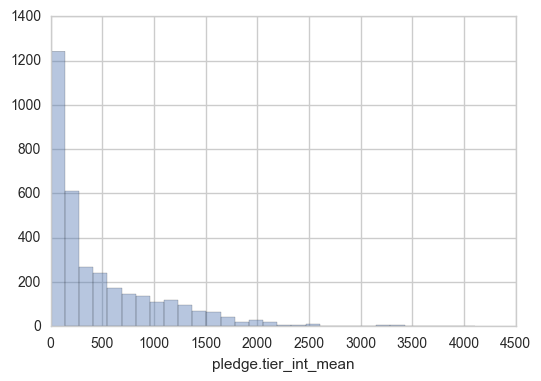

In [46]:
sns.distplot(back['pledge.tier_int_mean'],kde=False,bins=30)

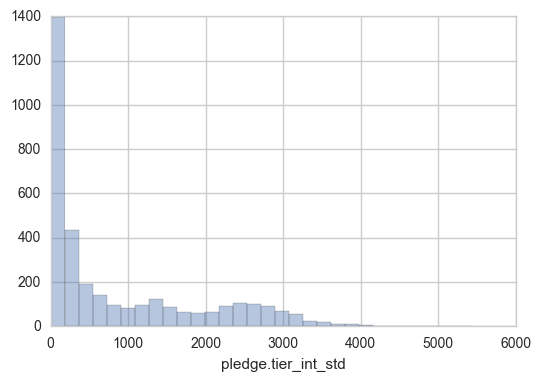

In [47]:
sns.distplot(back['pledge.tier_int_std'],kde=False,bins=30)

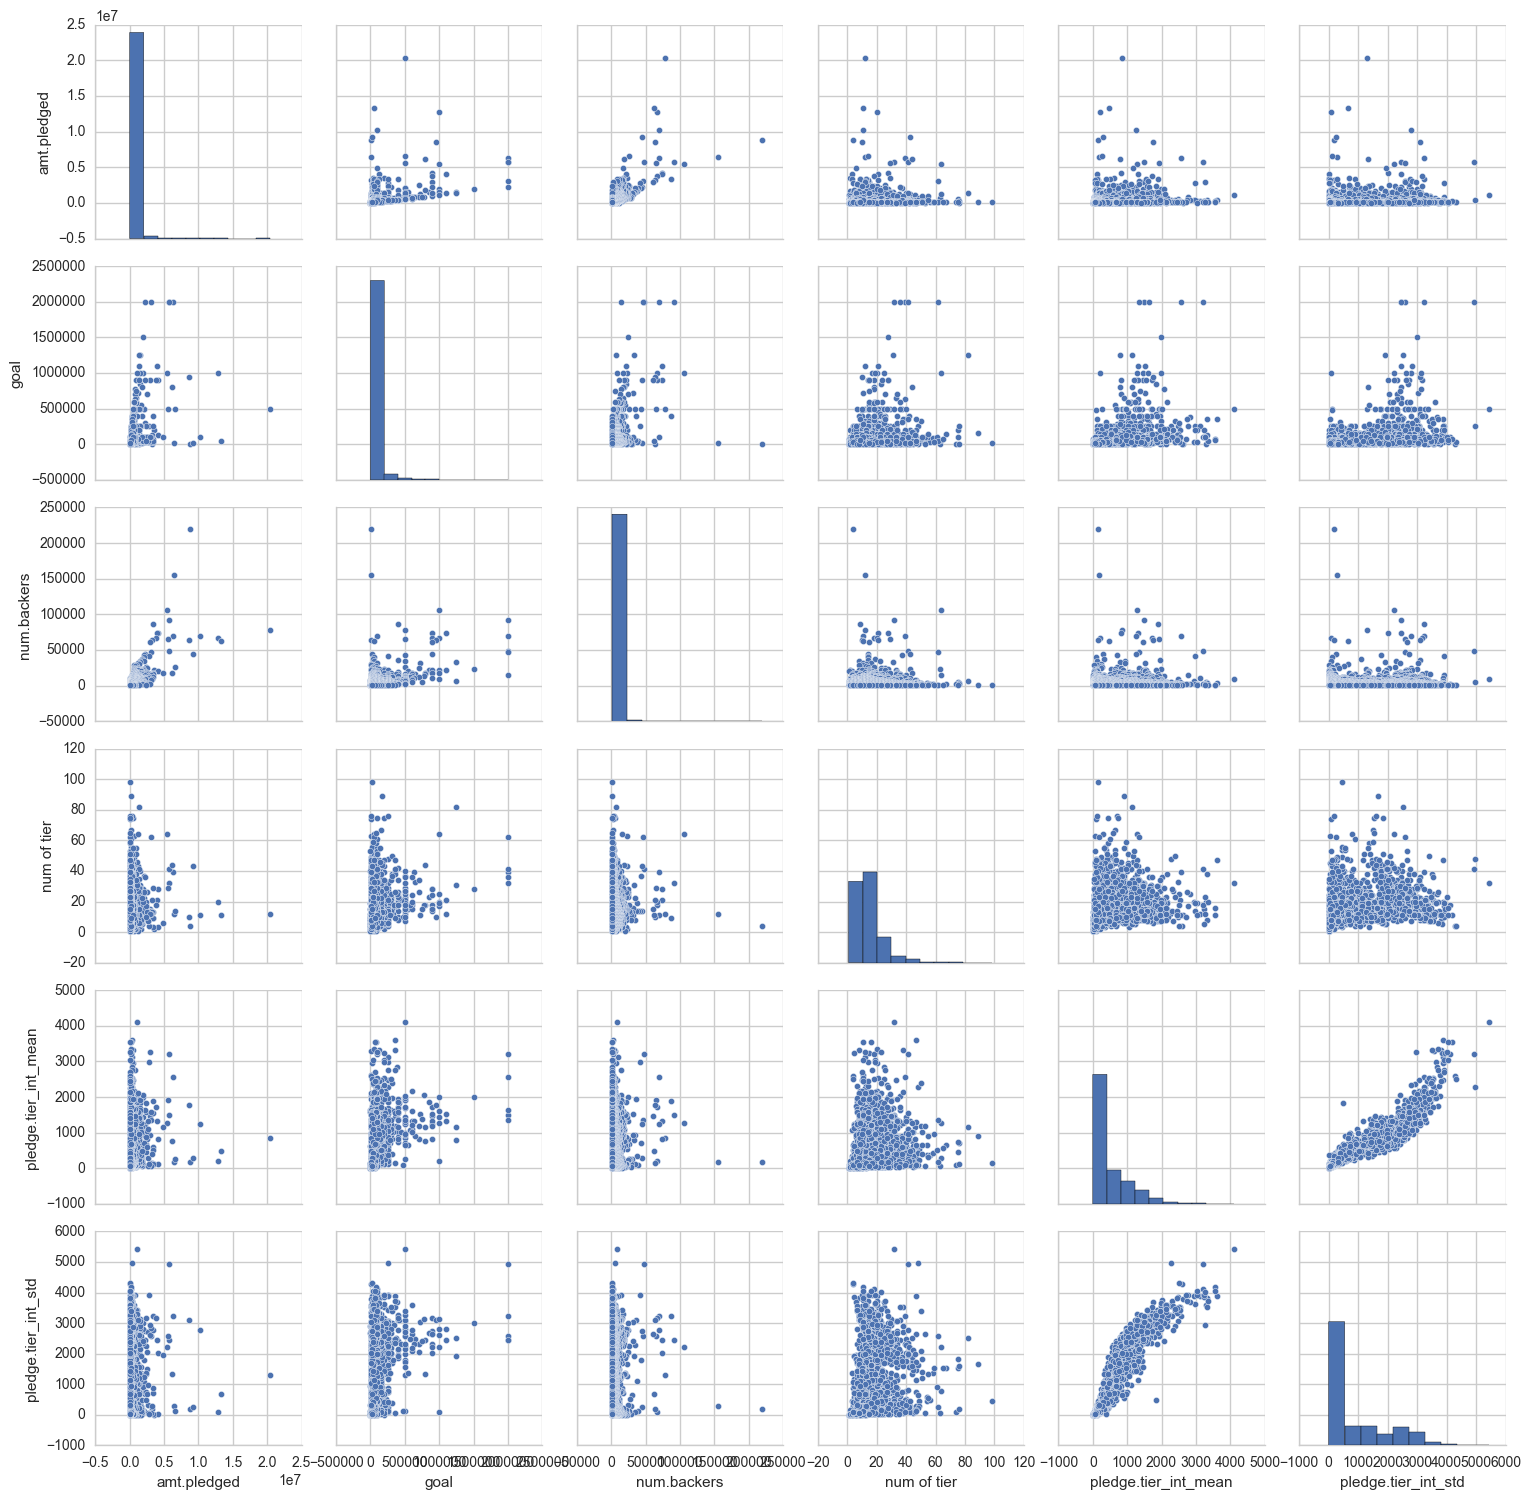

In [48]:
sns.pairplot(back)

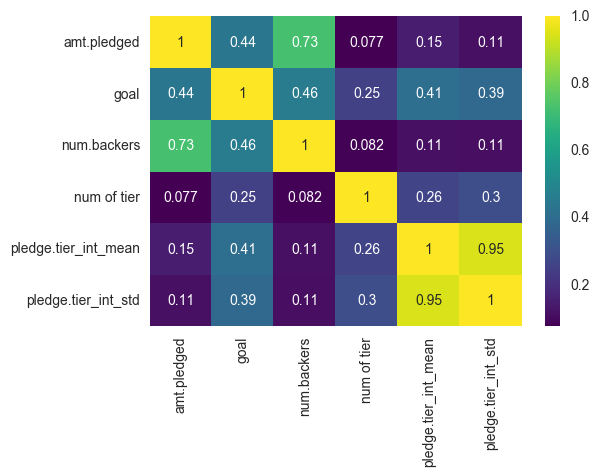

In [49]:
sns.heatmap(back.corr(),annot=True,cmap='viridis')

In [50]:
back.groupby('category').count().sort(['amt.pledged'],ascending=False).head(10)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,amt.pledged,blurb,by,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,num of tier,pledge.tier_int,pledge.tier_int_mean,pledge.tier_int_std
category,,,,,,,,,,,,,,,
Product Design,674,674,674,674,674,674,674,674,674,674,674,674,674,674,674
Tabletop Games,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670
Video Games,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410
Hardware,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145
Technology,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129
Documentary,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
Gadgets,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Design,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
Comics,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73


In [51]:
back.groupby('category').mean().sort(['num of tier'],ascending=False)['num of tier'].head(10)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


category
Faith              75.000000
Thrillers          67.000000
Romance            61.000000
Television         41.000000
Science Fiction    40.666667
Drama              38.000000
Pop                37.000000
Movie Theaters     35.000000
Action             34.000000
Horror             33.333333
Name: num of tier, dtype: float64

In [52]:
back.groupby('category').mean().sort(['pledge.tier_int_mean'],ascending=False)['pledge.tier_int_mean'].head(10)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


category
Drama                 3325.921053
Dance                 3316.875000
Television            3214.073171
Horror                2216.979192
Country &amp; Folk    2038.801934
Family                2021.338235
Audio                 1771.100000
Musical               1611.715466
Installations         1521.363636
Photo                 1509.733333
Name: pledge.tier_int_mean, dtype: float64

In [53]:
back.groupby('category').mean().sort(['pledge.tier_int_std'],ascending=False)['pledge.tier_int_std'].head(10)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


category
Television            4925.996001
Dance                 3810.469900
Drama                 3514.453206
Family                3176.913708
Audio                 3122.336463
Installations         3027.215260
Horror                3023.388158
Country &amp; Folk    2962.557603
Space Exploration     2806.510053
Interactive Design    2734.444577
Name: pledge.tier_int_std, dtype: float64